## CLASSIFICATION

 In this chapter we will be using the MNIST dataset, which is a set of 70,000 small
 images of digits handwritten by high school students and employees of the US Cen
sus Bureau. Each image is labeled with the digit it represents. This set has been stud
ied so much that it is often called the “hello world” of Machine Learning: whenever
 people come up with a new classification algorithm they are curious to see how it will
 perform on MNIST, and anyone who learns Machine Learning tackles this dataset
 sooner or later

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1, parser = 'auto')

In [3]:
type(mnist)

sklearn.utils._bunch.Bunch

In [4]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
mnist['data']

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
mnist['target']

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [8]:
X, y = mnist["data"], mnist["target"]

In [9]:
X.shape

(70000, 784)

In [10]:
print(type(X.index[334]))

<class 'int'>


In [11]:
y.shape

(70000,)

In [12]:
print(type(y))

<class 'pandas.core.series.Series'>


In [13]:
y[323]

'6'

 There are 70,000 images, and each image has 784 features. This is because each image
 is 28 × 28 pixels, and each feature simply represents one pixel’s intensity, from 0
 (white) to 255 (black).

#### Visualizing the images

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [15]:
digit = X.iloc[0].to_numpy().reshape(1,-1)
digit_plot = digit.reshape(28,28)

In [16]:
digit.shape

(1, 784)

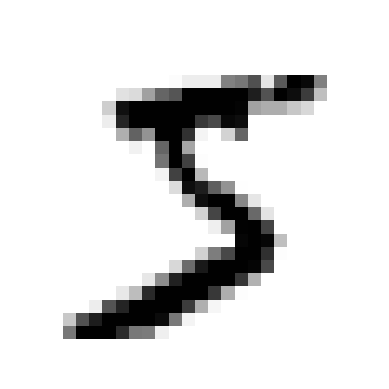

In [17]:
plt.imshow(digit_plot, cmap="binary")
plt.axis("off")
plt.show()

Now let's check the label from y


In [18]:
y[0]

'5'

Indeed it is 5, now NOTE THAT IT IS A STRING!, ML needs interger so convert into int


### TIP to convert altogether to int!!!

In [19]:
y = y.astype('uint8')

#### Splitting into Training and Testing

In [20]:
X_train, X_test, y_train, y_test = X[:60000].to_numpy(), X[60000:].to_numpy(), y[:60000].to_numpy(), y[60000:].to_numpy()

In [21]:
type(X_train)

numpy.ndarray

 The training set is already shuffled for us, which is good because this guarantees that
 all cross-validation folds will be similar (you don’t want one fold to be missing some
 digits). Moreover, some learning algorithms are sensitive to the order of the training
 instances, and they perform poorly if they get many similar instances in a row. Shuf
fling the dataset ensures that this won’t happen

#### NOTE

Shuffling may be a bad idea in some contexts—for example, if you are working on time series data (such as
 stock market prices or weather conditions)..


## Training a Binary Classifier

 Let’s simplify the problem for now and only try to identify one digit—for example,
 the number 5. This “5-detector” will be an example of a binary classifier, capable of
 distinguishing between just two classes, 5 and not-5. Let’s create the target vectors for
 this classification task:

In [22]:
y_train_5 = (y_train == 5)
y_train_5

array([ True, False, False, ...,  True, False, False])

In [23]:
y_test_5 = (y_test == 5)
y_test_5

array([False, False, False, ..., False,  True, False])

### SGDClassifier

Stochastic Gradi
ent Descent (SGD) classifier,

This classifier
 has the advantage of being capable of handling very large datasets efficiently. This is
 in part because SGD deals with training instances independently, one at a time
 (which also makes SGD well suited for online learning)

In [24]:
from sklearn.linear_model import SGDClassifier

In [25]:
sgd_clf = SGDClassifier(random_state=42)

In [26]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [27]:
sgd_clf.predict(digit)

array([ True])

#### Performance Measures

There are many performance  measures availabl for Evaluating a classifier,

##### Measuring Accuracy Using Cross-Validation

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=10, scoring="accuracy")

array([0.96416667, 0.95866667, 0.96416667, 0.95833333, 0.96733333,
       0.96933333, 0.96433333, 0.96583333, 0.9575    , 0.96566667])

Now, the accuracy is nice, but let's check a classifier that classifies not 5 digits

In [30]:
from sklearn.base import BaseEstimator

In [31]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [32]:
never_5_clf = Never5Classifier()

In [33]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

C:\Python 3.11\Lib\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python 3.11\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Python 3.11\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python 3.11\Lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python 3.11\Lib\site-packages\sklearn\utils\_response.py", line 218, in _get_response_values
    y_pred, pos_label = estimator.predict(X), None
                        ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manas\AppData\Local\Temp\ipykernel_23344\

array([nan, nan, nan])

##### Confusion Matrix

In [34]:
from sklearn.model_selection import cross_val_predict

In [35]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Just like the cross_val_score() function, cross_val_predict() performs K-fold
 cross-validation, but instead of returning the evaluation scores, it returns the predic
tions made on each test fold. This means that you get a clean prediction for each
 instance in the training set (“clean” meaning that the prediction is made by a model
 that never saw the data during training).

In [36]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

#####  Precision and Recall

In [39]:
from sklearn.metrics import precision_score, recall_score

In [40]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [41]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

,

##### F1 Score

F1
 score i 
 the harmonic mean of precision and reca3). Whereas the regular me 
 treats all values equally, the harmonic mean gives much more weight to low valu .
 As a result, the classifier will only get a higF1
 score if both recall and precisio are
 high.

In [42]:
from sklearn.metrics import f1_score

In [43]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

#### Precision/Recall Trade-of

 Unfortunately, you can’t have it both ways: increasing precision reduces recall, and
 vice versa. This is called the precision/recall trade-off.

##### decision_function

 Scikit-Learn does not let you set the threshold directly, but it does give you access to
 the decision scores that it uses to make predictions. Instead of calling the classifier’s
 predict() method, you can call its decision_function() method, which returns a
 score for each instance, and then use any threshold you want to make predictions
 based on those scores

In [44]:
y_scores = sgd_clf.decision_function(digit)

In [45]:
y_scores

array([2164.22030239])

In [46]:
threshold = 0

In [47]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

#### How do you decide which threshold to use? 
First, use the cross_val_predict()
 function to get the scores of all instances in the training set, but this time specify that
 you want to return decision scores instead of predictions:

In [48]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
 method="decision_function")

In [49]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

With these scores, use the precision_recall_curve() function to compute precision
 and recall for all possible thresholds:

In [50]:
from sklearn.metrics import precision_recall_curve

In [51]:
 precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [52]:
precisions

array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
       1.        ])

In [53]:
recalls

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       3.68935621e-04, 1.84467810e-04, 0.00000000e+00])

In [54]:
thresholds

array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
         38871.26391927,   42216.05562787,   49441.43765905])

In [55]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

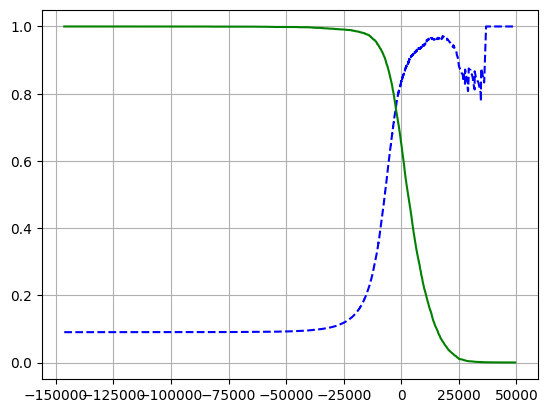

In [56]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.grid()
plt.show()

Plotting Precision directly against recall

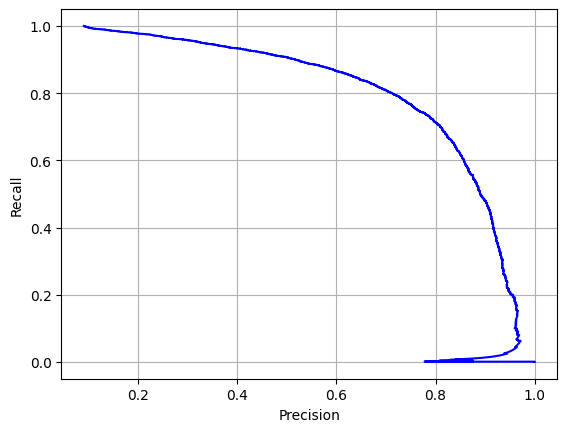

In [57]:
plt.plot(precisions[:-1], recalls[:-1], "b-", label="Recall")
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.grid()
plt.show()

Suppose you decide to aim for 90% precision. You look up the first plot and find that
 you need to use a threshold of about 8,000. To be more precise you can search for the
 lowest threshold that gives you at least 90% precision (np.argmax() will give you the
 first index of the maximum value, which in this case means the first True value):

In [58]:
import numpy as np
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.0194991439557

In [59]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [60]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [61]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [62]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [63]:
y_train_pred_90

array([False, False, False, ...,  True, False, False])

#### The ROC Curve

The receiver operating characteristic (ROC) curve is another common tool used with
 binary classifiers. It is very similar to the precision/recall curve, but instead of plot
ting precision versus recall, the ROC curve plots the true positive rate (another name
 for recall) against the false positive rate (FPR). The FPR is the ratio of negative instan
ces that are incorrectly classified as positive. It is equal to 1 – the true negative rate
 (TNR), which is the ratio of negative instances that are correctly classified as negative.
 The TNR is also called specificity. Hence, the ROC curve plots sensitivity (recall) ver
sus 1 – specificity.

In [64]:
from sklearn.metrics import roc_curve

In [65]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [66]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99937705, 0.99937705,
       1.        ])

In [67]:
tpr

array([0.00000000e+00, 1.84467810e-04, 9.22339052e-04, ...,
       9.99815532e-01, 1.00000000e+00, 1.00000000e+00])

In [68]:
thresholds

array([             inf,   49441.43765905,   36801.60697028, ...,
       -105763.22240074, -106527.45300471, -146348.56726174])

In [69]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=5, label=label)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.grid()
    plt.xlabel('fpr')
    plt.ylabel('tpr')

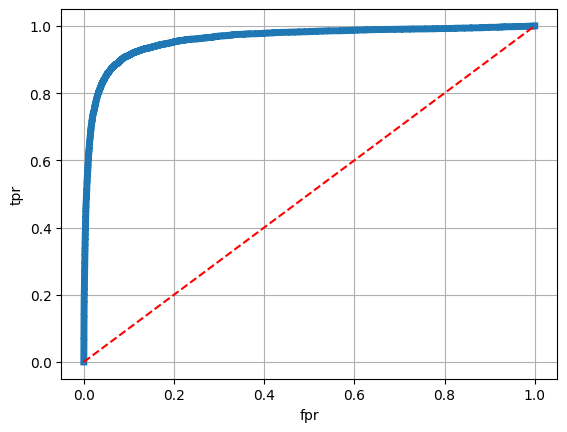

In [70]:
plot_roc_curve(fpr, tpr)
plt.show()

#### ROC AUC

One way to compare classifiers is to measure the area under the curve (AUC). A per
fect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will
 have a ROC AUC equal to 0.5.

In [71]:
from sklearn.metrics import roc_auc_score

In [72]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

Since the ROC curve is so similar to the precision/recall (PR)
 curve, you may wonder how to decide which one to use. As a rule
 of thumb, you should prefer the PR curve whenever the positive
 class is rare or when you care more about the false positives than
 the false negatives. Otherwise, use the ROC curve. For example,
 looking at the previous ROC curve (and the ROC AUC score), you
 may think that the classifier is really good. But this is mostly
 because there are few positives (5s) compared to the negatives
 (non-5s). In contrast, the PR curve makes it clear that the classifier
 has room for improvement (the curve could be closer to the top
left corner).

### RandomForestClassifier

the Random ForestClassifier class does not have a decision_function() method. Instead, t has a predict_proba() method. Scikit-Learn classifiers generally have one or the  other, or both. The predict_proba() method returns an array containing a row per
 instance and a column per class, each containing the probability that the giv 
 instance belongs to the given classt

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
forest_clf = RandomForestClassifier(random_state=42)

In [75]:
y_predprob_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,method="predict_proba")

In [76]:
y_predprob_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [77]:
y_scores_predprob_forest = y_predprob_forest[:, 1]
y_scores_predprob_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [78]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [79]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_predprob_forest)

Now we plot the curves and see both side by side the SGDC and the Random Forest

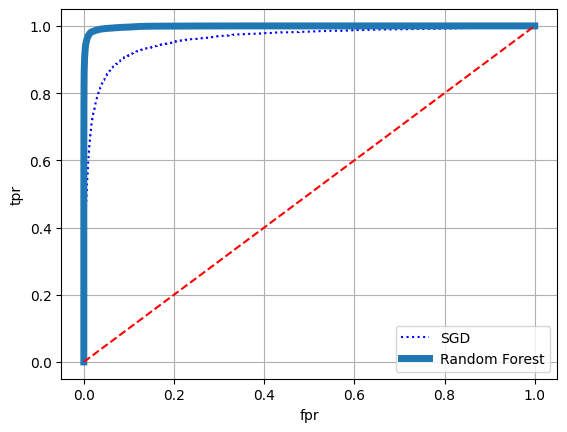

In [80]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [81]:
roc_auc_score(y_train_5, y_scores_predprob_forest)

0.9983436731328145

In [82]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [83]:
y_scores_predprob_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

## Multiclass Classification

binary classifiers distinguish between two classes, multiclass classifiers (also
 called multinomial classifiers) can distinguish between more than two classes

Some algorithms (such as SGD classifiers, Random Forest classifiers, and naive Bayes
 classifiers) are capable of handling multiple classes natively. Others (such as Logistic
 Regression or Support Vector Machine classifiers) are strictly binary classifiers.

#### Scikit-Learn detects when you try to use a binary classification algorithm for a multi
class classification tas
 it automatically runs OvR or OvO, depending on th
 algorithm. 

### Support Vector Machine classifier 

In [84]:
from sklearn.svm import SVC

In [85]:
svm_clf = SVC()

In [86]:
svm_clf.fit(X_train, y_train)

SVC()

In [87]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [88]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [89]:
svm_clf.predict(digit)

array([5], dtype=uint8)

#### This code trains the SVC on the training set using the original target
 classes from 0 to 9 (y_train), instead of the 5-versus-the-rest target classes 
 (y_train_5). Then it makes a prediction (a correct one in this case). Under the hood, 
 Scikit-Learn actually used the OvO strategy: it trained 45 binary classifiers, got the r
 decision scores for the image, and selected the class that won the most duels.

If you call the decision_function() method, you will see that it returns 10 scores
 per instance (instead of just 1). That’s one score per class:

In [90]:
some_digit_scores = svm_clf.decision_function(digit)
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [91]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### Now here you got lucky, as the classifier that was the best turned out to be for 5 and you checked for 5, this will be very rare

#### Let's check another scenario

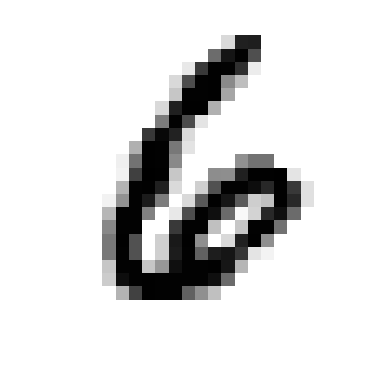

In [92]:
digit = X.iloc[13].to_numpy().reshape(1,-1)
digit_plot = digit.reshape(28,28)

plt.imshow(digit_plot, cmap="binary")
plt.axis("off")
plt.show()

In [93]:
svm_clf.predict(digit)

array([6], dtype=uint8)

In [94]:
some_digit_scores = svm_clf.decision_function(digit)
some_digit_scores

array([[ 2.74595807, -0.30359744,  7.27348525,  2.71285886,  8.2918957 ,
         3.79555564,  9.31506704,  0.70390824,  6.22120645,  3.79157885]])

Now understand this OvO, so scikit-learn trained 45 classifier, how 45? Well there are 10 classes, and when for OvO you follow the formula (N x (N-1))/2. N is the number of classes. Now how is it 45? So you train a classifier for 0 vs 1, then 0 vs 2 and so on till 0 vs 9. Now when you start for 1 vs, you won't do 1 vs 0 and start with 1 vs 2 and you do like this till the end when you reach you'll only have 8 vs 9

When it's time to predict, Scikit learn will run the input through all the classifiers and then select the one that gave it the higest score

### Error Analysis

 If this were a real project, you would now follow the steps in your Machine Learning
 project checklis You’d explore data preparation options, try out
 multiple models (shortlisting the best ones and fine-tuning their hyperparameters
 using GridSearchCV), and automate as much as possible. Here, we will assume that
 you have found a promising model and you want to find ways to improve it. One way
 to do this is to analyze the types of errors it makes.t

First, look at the confusion matrix. You need to make predictions using the
 cross_val_predict() function, then call the confusion_matrix() function, just like
 you did earlier:


Before that we transform the data

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [96]:
X_train_scaled = scaler.fit_transform(X_train)

In [97]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [98]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [99]:
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

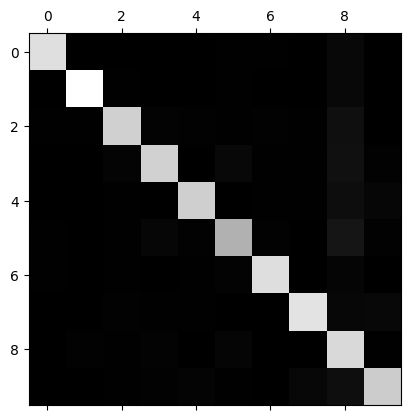

In [100]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

Let’s focus the plot on the errors. First, you need to divide each value in the confusion
 matrix by the number of images in the corresponding class so that you can compare
 error rates instead of absolute numbers of errors (which would make abundant
 classes look unfairly bad):

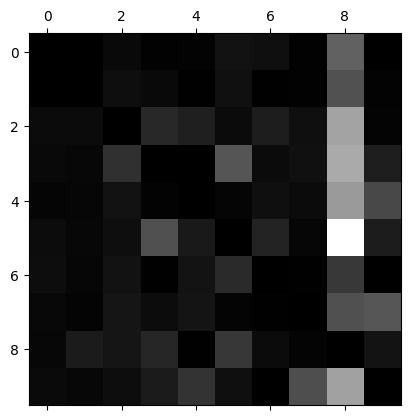

In [101]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

### Multilabel Classification

Until now each instance has always been assigned to just one class. In some cases you
 may want your classifier to output multiple classes for each instance. Consider a face
recognition classifier: what should it do if it recognizes several people in the same
 picture? It should attach one tag per person it recognizes. Say the classifier has been
 trained to recognize three faces, Alice, Bob, and Charlie. Then when the classifier is
 shown a picture of Alice and Charlie, it should output [1, 0, 1] (meaning “Alice yes,
 Bob no, Charlie yes”). Such a classification system that outputs multiple binary tags is
 called a multilabel classification system.

In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [104]:
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [105]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [106]:
y_train_large

array([False, False, False, ..., False, False,  True])

In [107]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [108]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

This code creates a y_multilabel array containing two target labels for each digit
 image: the first indicates whether or not the digit is large (7, 8, or 9), and the second
 indicates whether or not it is odd. The next lines create a KNeighborsClassifier
 instance (which supports multilabel classification, though not all classifiers do), and
 we train it using the multiple targets array. Now you can make a prediction, and
 notice that it outputs two labels:

In [109]:
knn_clf.predict(digit)

array([[False, False]])

#### Evaluating the classifier

In [110]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

In [111]:
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9778357403921755

### Multioutput Classification

The last type of classification task we are going to discuss here is called multioutput
multiclass classification (or simply multioutput classification). It is simply a generaliza
tion of multilabel classification where each label can be multiclass (i.e., it can have
 more than two possible values).

 To illustrate this, let’s build a system that removes noise from images. It will take as
 input a noisy digit image, and it will (hopefully) output a clean digit image, repre
sented as an array of pixel intensities, just like the MNIST images. Notice that the
 classifier’s output is multilabel (one label per pixel) and each label can have multiple
 values (pixel intensity ranges from 0 to 255). It is thus an example of a multioutput
 classification system.

Let’s start by creating the training and test sets by taking the MNIST images and
 adding noise to their pixel intensities with NumPy’s randint() function. The target
 images will be the original images:

In [112]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

#### Now we fit the model with blurry images and clean images

In [113]:
knn_clf.fit(X_train_mod, X_train)

KNeighborsClassifier()

In [114]:
clean_digit = knn_clf.predict([X_test_mod[678]])
clean_digit

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [115]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

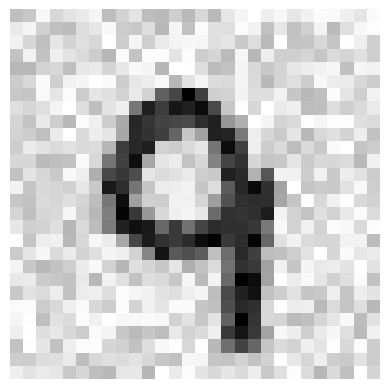

In [116]:
plot_digit(X_test_mod[678])

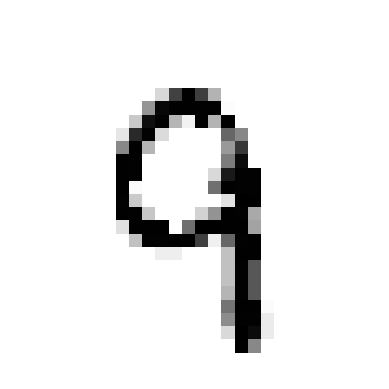

In [117]:
plot_digit(clean_digit)
